# Aufgabe
Verwendet in dieser Aufgabe das bikesharing_simple.csv Datenset. Entwickelt auf Basis dieses Datensets
eine Strategie zur Vorverarbeitung der Daten. Ziel eurer Strategie soll es sein, die Daten für Machine Learning
vorzubereiten.

In [73]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler

Eine ausführliche Vorverarbeitung der Daten beinhaltet folgende Schritte: 

1. Check out the missing values
2. Encode the Categorical Values
3. Standardize data / Feature Scaling

In [74]:
data = pd.read_csv("../../data/bikesharing_simple.csv")

In [75]:
data.head(3)

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt,windspeed
0,0,1,2011-01-01,spring,0,1,0,0,Saturday,No,Clear,0.24,0.2879,0.81,3,13,16,0.0
1,1,2,2011-01-01,spring,0,1,1,0,Saturday,No,Clear,0.22,0.2727,0.80,8,32,40,0.0
2,2,3,2011-01-01,spring,0,1,2,0,Saturday,No,Clear,0.22,0.2727,0.80,5,27,32,0.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17379 non-null  int64  
 1   instant     17379 non-null  int64  
 2   dteday      17379 non-null  object 
 3   season      17379 non-null  object 
 4   yr          17379 non-null  int64  
 5   mnth        17379 non-null  int64  
 6   hr          17379 non-null  int64  
 7   holiday     17379 non-null  int64  
 8   weekday     17379 non-null  object 
 9   workingday  17379 non-null  object 
 10  weathersit  17379 non-null  object 
 11  temp        17379 non-null  float64
 12  atemp       17379 non-null  float64
 13  hum         17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  windspeed   16817 non-null  float64
dtypes: float64(4), int64(9), object(5)
memory usage: 2.4+ MB


## 1. Missing Values

In [77]:
data.isna().any()

Unnamed: 0    False
instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
casual        False
registered    False
cnt           False
windspeed      True
dtype: bool

In [78]:
data.isnull().any()

Unnamed: 0    False
instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
casual        False
registered    False
cnt           False
windspeed      True
dtype: bool

mean 0.1904967592317298
median 0.194
max 0.8507
unique 31


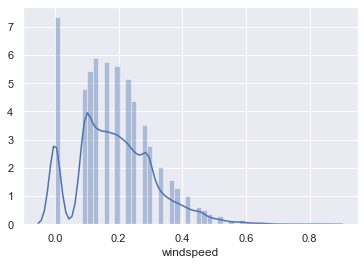

In [79]:
print("mean", data.windspeed.mean())
print("median", data.windspeed.median())
print("max", data.windspeed.max())
print("unique", len(data.windspeed.unique()))
sns.set(color_codes=True)
sns.distplot(data.windspeed)

Der Datensatz beinhaltet 17379 Samples. 16 der 17 Features sind ohne Nullwerte, lediglich bei Windspeed gibt es nur 16817 Werte. Ebenso gibt es bei Windspeed na-Werte.

Die fehlenden Werte bzw. die na-Werte könnten z.B. mit den Median oder den Mean ersetzt werden, da Mean und Median relativ nahe beieinander liegen. Allerdings muss dabei beachtet werden, dass diese Methode das Model beeinflussen kann. Alternativ kann man die Datensätze auch entfernen.

## 2. Encode Categorical Values

In [80]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object

In [81]:
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [82]:
categorical_cols

['dteday', 'season', 'weekday', 'workingday', 'weathersit']

Im Datensatz gibt es folgende Kategorische-Daten: 'dteday', 'season', 'weekday', 'workingday', 'weathersit'. Diese Features können wir z.B. mittels des One-Hot-Encoders zu einem numerischen Features umwandeln.

In [83]:
ohe = OneHotEncoder()

Im Datensatz gibt es folgende Kategorische-Daten: 'dteday', 'season', 'weekday', 'workingday', 'weathersit'. 
Diese Features können wir z.B. mittels des One-Hot-Encoders zu einem numerischen Features umwandeln. Das Features 'dteday' ist in diesem Fall allerdings besonders da es ein Datum ist und der Datensatz 'yr' und 'mnth' bereits als numerische Features hat. 
Da dies so ist, würde ich die Spalte 'dteday' entfernen, da 'yr' und 'mnth' besser für die weitere Analyse geeignet sind.

In [84]:
categorical_cols.remove("dteday")
print(categorical_cols)
ohe.fit(data[categorical_cols])
one_hot_encoded_data = ohe.transform(data[categorical_cols]).toarray()
one_hot_encoded_data

['season', 'weekday', 'workingday', 'weathersit']


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Standardize data / Feature Scaling
Dieser Schritt beinhaltet das Skalieren aller numerischen Daten. Wir können hierfür z.B. den MinMaxScaler oder den RobustScaler verwenden. 

In [85]:
numeric_feature_mask = data.dtypes!=object

In [86]:
numeric_cols = data.columns[numeric_feature_mask].tolist()

In [87]:
numeric_cols

['Unnamed: 0',
 'instant',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'temp',
 'atemp',
 'hum',
 'casual',
 'registered',
 'cnt',
 'windspeed']

In [88]:
robustScaler = RobustScaler()
robustScaler.fit(data[numeric_cols])
scaled = robustScaler.transform(data[numeric_cols])

In [89]:
scaled

array([[-1.        , -1.        , -1.        , ..., -0.5483871 ,
        -0.52282158, -1.3002681 ],
       [-0.99988491, -0.99988491, -1.        , ..., -0.44623656,
        -0.42323651, -1.3002681 ],
       [-0.99976982, -0.99976982, -1.        , ..., -0.47311828,
        -0.45643154, -1.3002681 ],
       ...,
       [ 0.99976982,  0.99976982,  0.        , ..., -0.17204301,
        -0.21576763, -0.1997319 ],
       [ 0.99988491,  0.99988491,  0.        , ..., -0.36021505,
        -0.33609959, -0.40013405],
       [ 1.        ,  1.        ,  0.        , ..., -0.41935484,
        -0.38589212, -0.40013405]])